In [1]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

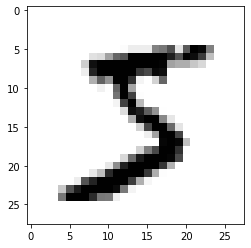

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [4]:
x_train = tf.keras.utils.normalize(x_train , axis =1)
x_test = tf.keras.utils.normalize(x_test , axis =1)

model = tf.keras.models.Sequential() #normal feedforward network
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation = tf.nn.softmax))

model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs =3)

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2653 - accuracy: 0.9230
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1074 - accuracy: 0.9664
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0725 - accuracy: 0.9768


In [5]:
val_loss, val_accuracy = model.evaluate(x_test,y_test)
print(val_loss,val_accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.0932 - accuracy: 0.9716
0.09322714805603027 0.9715999960899353


In [8]:
model.save("generic_num_reader.model")

INFO:tensorflow:Assets written to: generic_num_reader.model\assets


In [9]:
new_model = tf.keras.models.load_model("generic_num_reader.model")

In [10]:
predictions = new_model.predict([x_test]) #always takes in list
print(predictions)

[[3.66174951e-10 9.65295133e-09 2.40415875e-06 ... 9.99995351e-01
  1.40379717e-08 1.15392620e-08]
 [5.33314868e-08 4.83768745e-05 9.99923229e-01 ... 9.35472810e-10
  7.14534781e-06 1.76075154e-10]
 [8.13526597e-08 9.98806834e-01 1.82500982e-04 ... 3.05872178e-04
  5.89925505e-04 1.66246218e-06]
 ...
 [2.04948066e-07 1.50122992e-06 2.82795412e-07 ... 8.10586935e-05
  6.19141647e-05 2.29500327e-03]
 [1.18658976e-08 2.10449951e-08 1.39095206e-08 ... 2.80040524e-08
  1.21677775e-04 2.97693342e-10]
 [1.34897971e-06 7.58574288e-08 4.75355307e-07 ... 6.19497856e-11
  5.45024328e-08 7.62581720e-10]]


In [11]:
import numpy as np
print(np.argmax(predictions[0]))

7


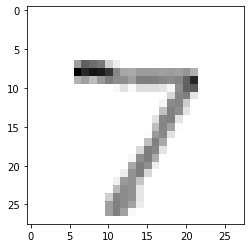

In [12]:
plt.imshow(x_test[0], cmap = plt.cm.binary)
plt.show()